In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path

home = Path("/Volumes/LaCie/smb/smb")

In [2]:
from lib.bisicles_defaults import GRID_8KM
x, y = GRID_8KM

bedmachine = xr.open_dataset("/Users/jonniebarnsley/data/BedMachine/BedMachine_antarctica_v3_bisicles_8km.nc")
bedmachine = bedmachine.assign_coords(x=x, y=y)
ice = bedmachine.thickness > 0

In [3]:
data = {}
for scenario in ['historical', 'ssp126', 'ssp585', 'ssp534-over']:
    data_dir = home / scenario
    data[scenario] = {}
    for file in data_dir.glob("*.nc"):
        model = file.stem.split("_")[1]
        ds = xr.open_dataset(file)
        data[scenario][model] = ds.smb.where(ice).mean(dim=['x', 'y'])

Text(0.5, 1.0, 'Historical Antarctic SMB')

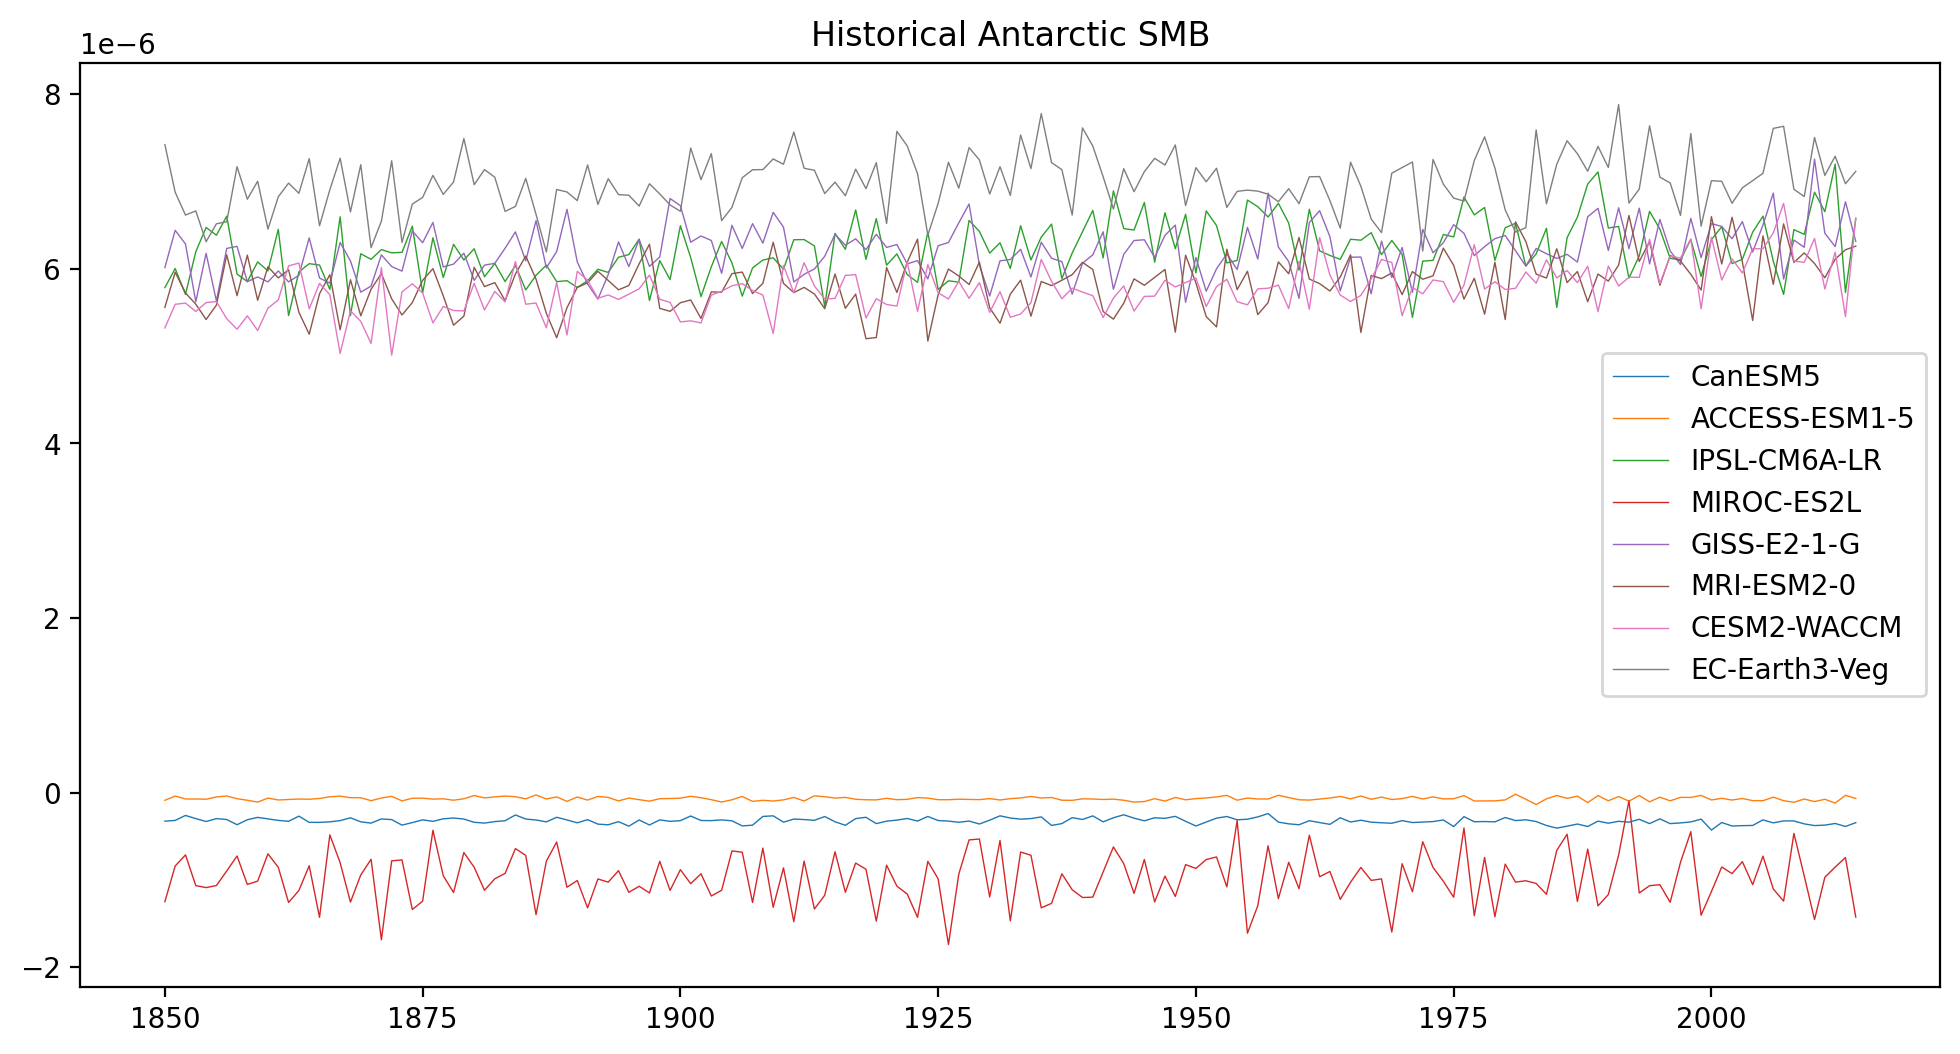

In [4]:
fig, ax = plt.subplots(figsize = (12, 6), dpi=200)
for model, smb in data['historical'].items():
    ax.plot(smb.time, smb, label=model, lw = 0.5)
plt.legend()
plt.title("Historical Antarctic SMB")

Text(0.5, 1.0, 'SSP126 Antarctic SMB')

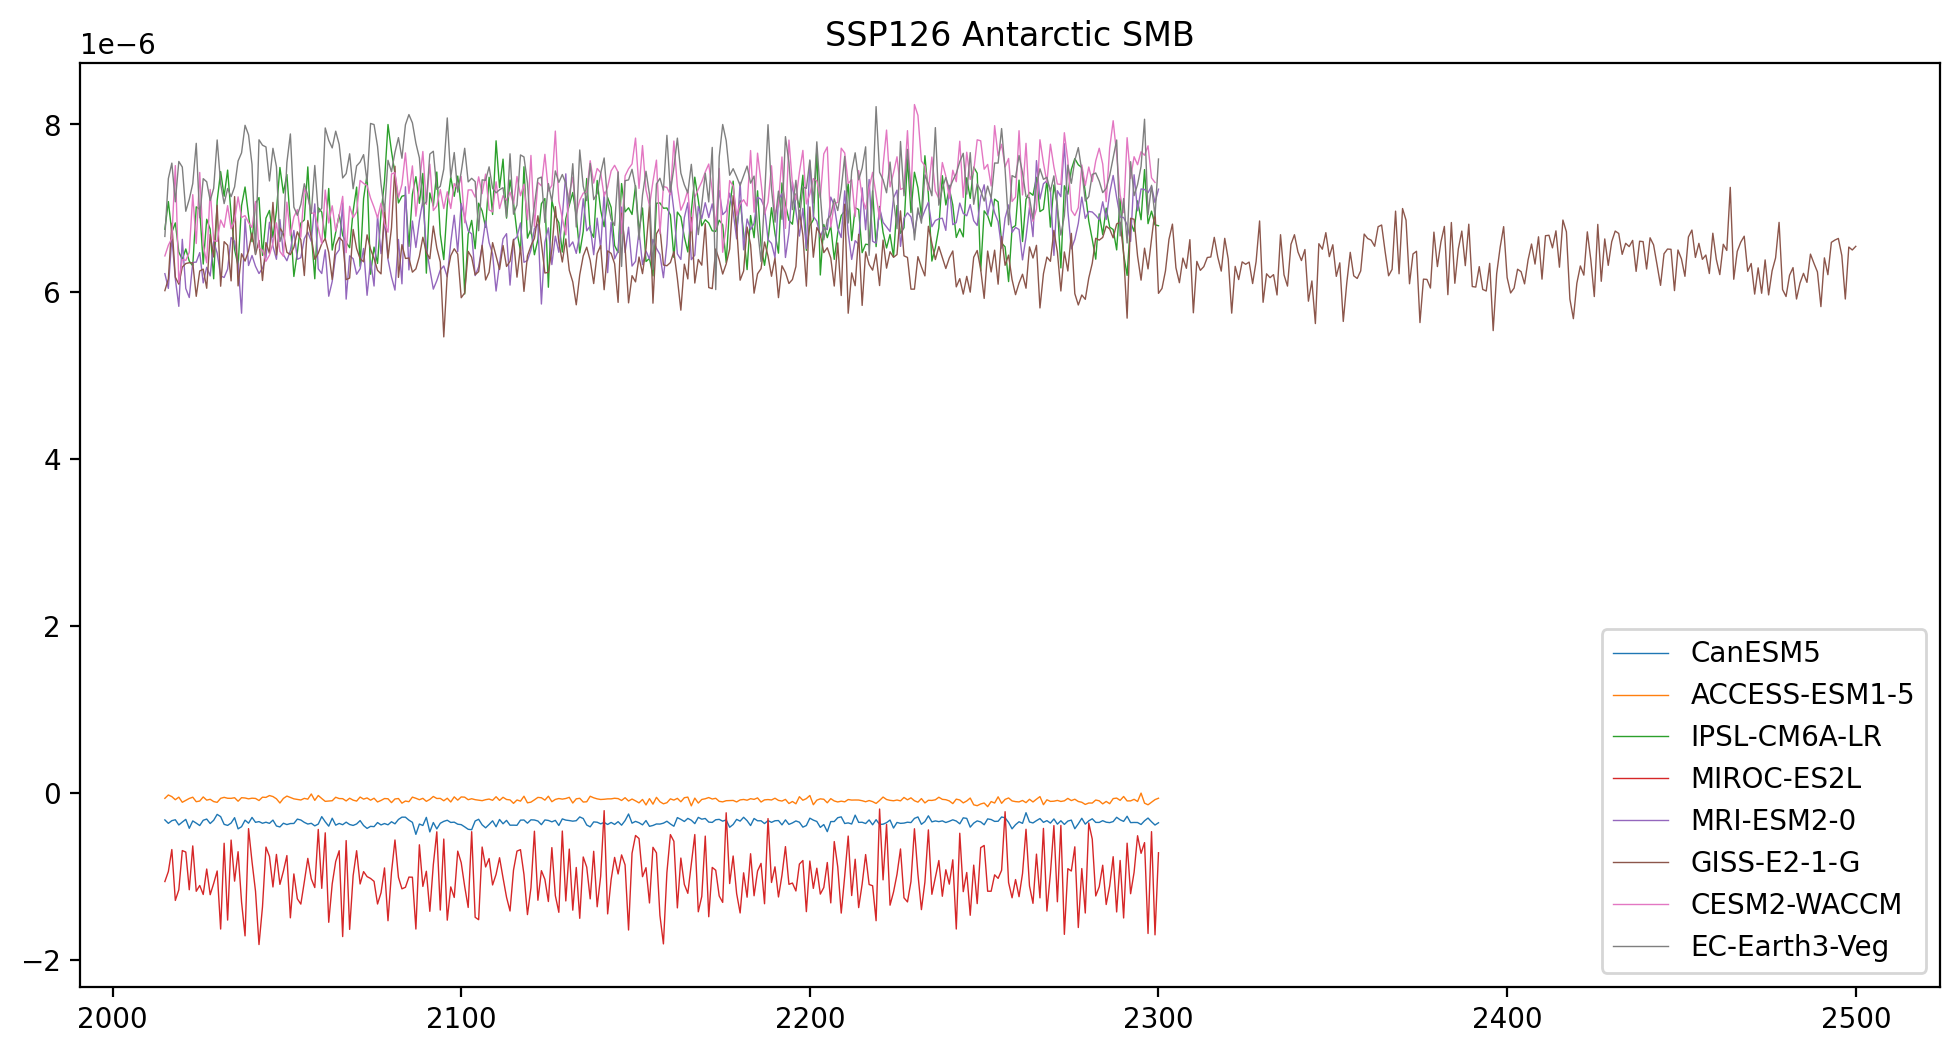

In [5]:
fig, ax = plt.subplots(figsize = (12, 6), dpi=200)
for model, smb in data['ssp126'].items():
    ax.plot(smb.time, smb, label=model, lw = 0.5)
plt.legend()
plt.title("SSP126 Antarctic SMB")

Text(0.5, 1.0, 'SSP585 Antarctic SMB')

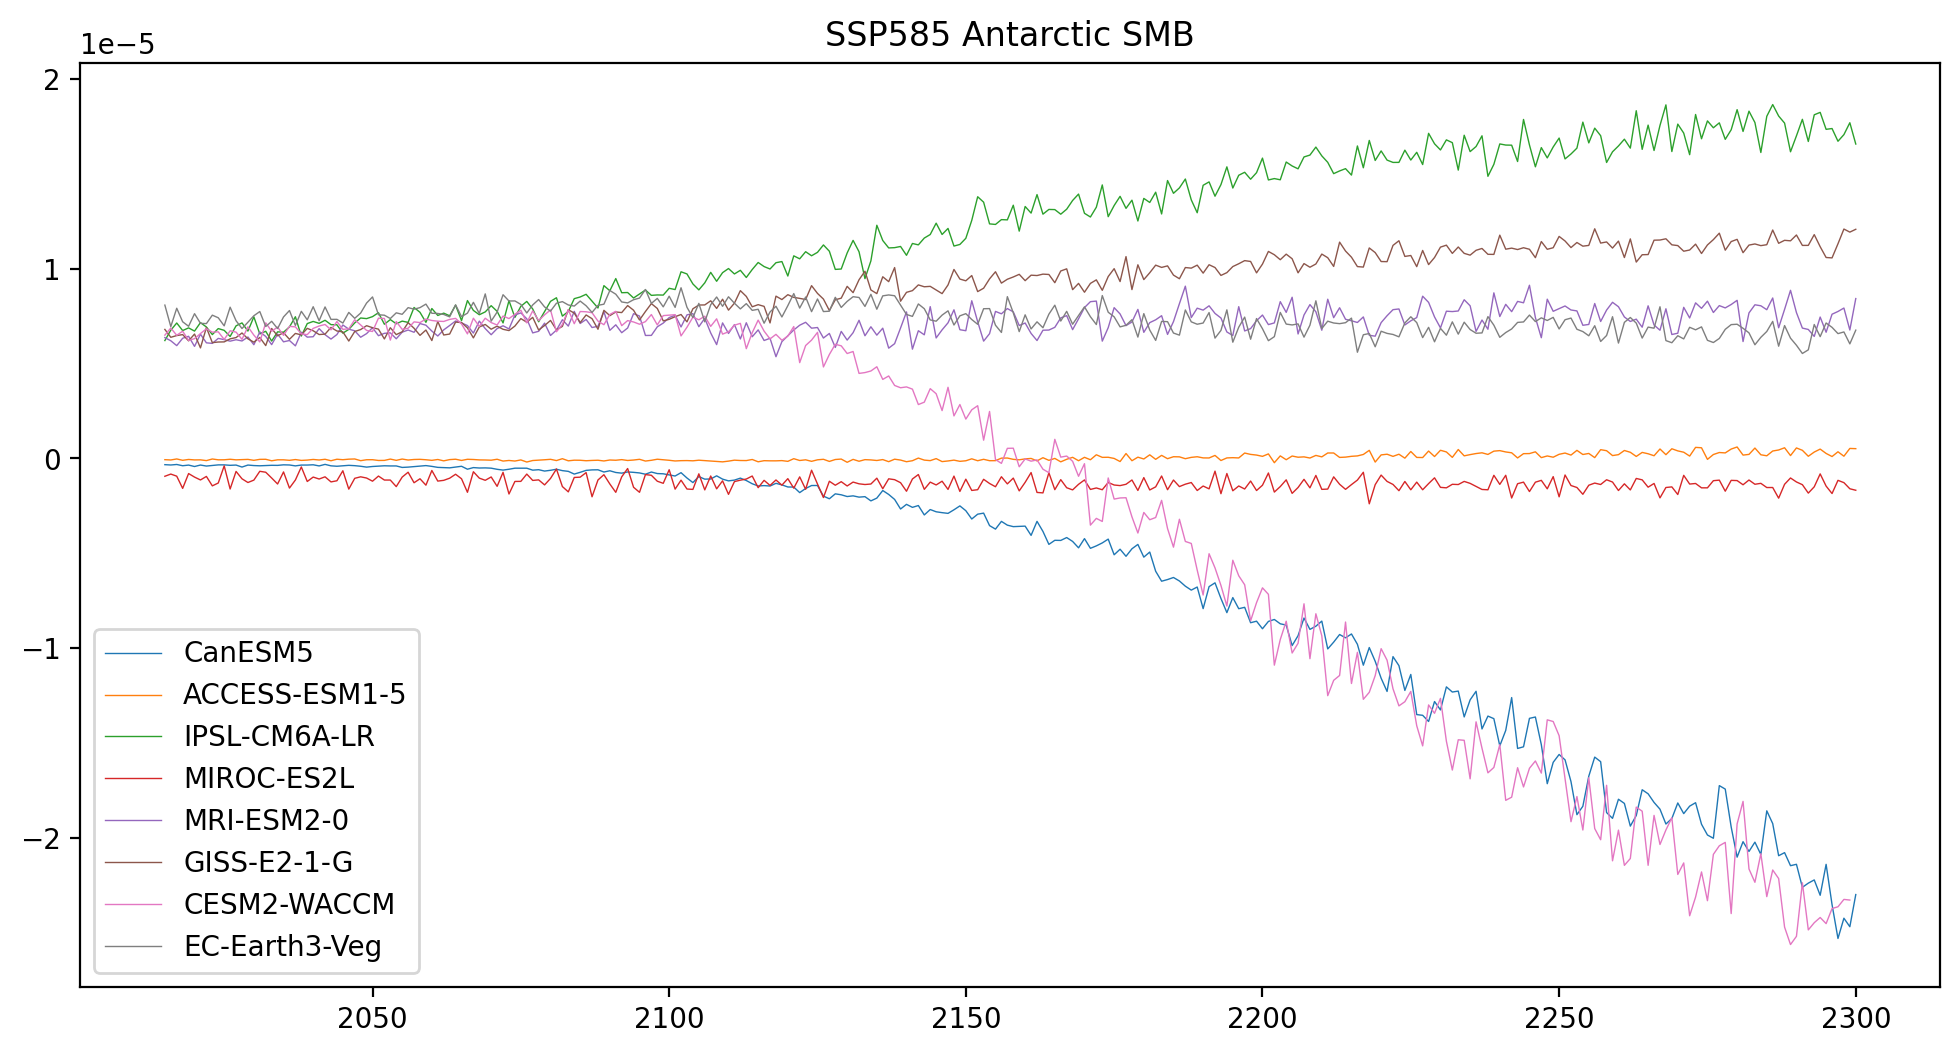

In [6]:
fig, ax = plt.subplots(figsize = (12, 6), dpi=200)
for model, smb in data['ssp585'].items():
    ax.plot(smb.time, smb, label=model, lw = 0.5)
plt.legend()
plt.title("SSP585 Antarctic SMB")

Text(0.5, 1.0, 'SSP534-over Antarctic SMB')

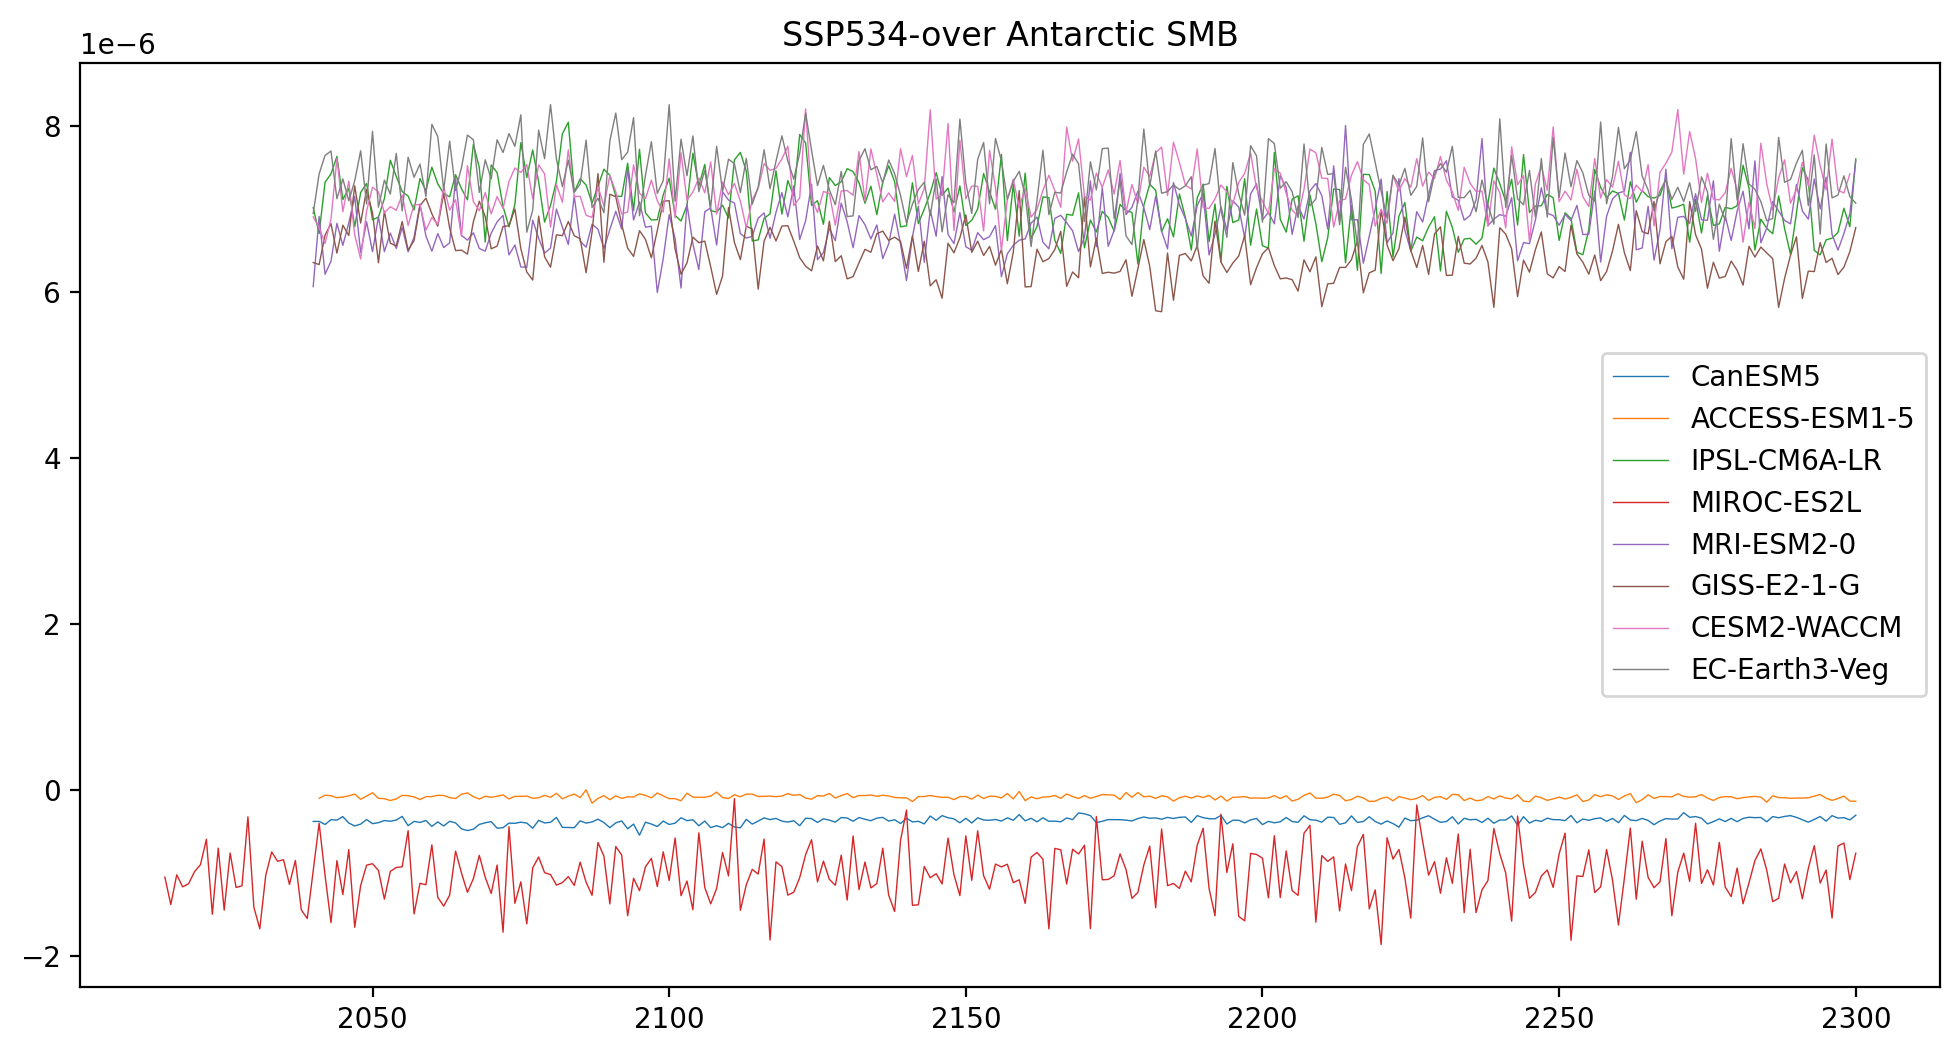

In [7]:
fig, ax = plt.subplots(figsize = (12, 6), dpi=200)
for model, smb in data['ssp534-over'].items():
    ax.plot(smb.time, smb, label=model, lw = 0.5)
plt.legend()
plt.title("SSP534-over Antarctic SMB")